## Identify core of AW layer in each row

In [12]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gsw

In [2]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'
salt_dir  = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

Open theta datasets

In [3]:
theta_row000 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_row025 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_row050 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_row075 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_row100 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_row125 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_row150 = xr.open_dataset(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

Open salinity datasets

In [4]:
salt_row000 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_row025 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_row050 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_row075 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_row100 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_row125 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_row150 = xr.open_dataset(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

Calculate seasonal climatologies

In [5]:
## define a function to map timestamps to seasons
def map_to_season(month):
    if 1 <= month <= 3:
        return 'JFM'
    elif 4 <= month <= 6:
        return 'AMJ'
    elif 7 <= month <= 9:
        return 'JAS'
    elif 10 <= month <= 12:
        return 'OND'

## create function to take seasonal means
def seasonal_mean(ds):
    ## apply the above function to create a new coordinate 'season'
    seasons_array = xr.apply_ufunc(map_to_season, ds['time.month'], dask = 'allowed', vectorize = True)
    ds.coords['season'] = ('time', seasons_array.values)

    # group by 'season' and calculate the mean of 'value' for each season
    seasonal_means = ds.groupby('season').mean()
    return seasonal_means

In [6]:
## apply function to datasets

## theta
theta_row000_season = seasonal_mean(theta_row000)
theta_row025_season = seasonal_mean(theta_row025)
theta_row050_season = seasonal_mean(theta_row050)
theta_row075_season = seasonal_mean(theta_row075)
theta_row100_season = seasonal_mean(theta_row100)
theta_row125_season = seasonal_mean(theta_row125)
theta_row150_season = seasonal_mean(theta_row150)

## salinity
salt_row000_season = seasonal_mean(salt_row000)
salt_row025_season = seasonal_mean(salt_row025)
salt_row050_season = seasonal_mean(salt_row050)
salt_row075_season = seasonal_mean(salt_row075)
salt_row100_season = seasonal_mean(salt_row100)
salt_row125_season = seasonal_mean(salt_row125)
salt_row150_season = seasonal_mean(salt_row150)

In [7]:
## mask values that are not water (i.e., land mask)
## theta
theta_row000_season = theta_row000_season.where(salt_row000_season.SALT>0)
theta_row025_season = theta_row025_season.where(salt_row025_season.SALT>0)
theta_row050_season = theta_row050_season.where(salt_row050_season.SALT>0)
theta_row075_season = theta_row075_season.where(salt_row075_season.SALT>0)
theta_row100_season = theta_row100_season.where(salt_row100_season.SALT>0)
theta_row125_season = theta_row125_season.where(salt_row125_season.SALT>0)
theta_row150_season = theta_row150_season.where(salt_row150_season.SALT>0)

## salinity
salt_row000_season = salt_row000_season.where(salt_row000_season.SALT>0)
salt_row025_season = salt_row025_season.where(salt_row025_season.SALT>0)
salt_row050_season = salt_row050_season.where(salt_row050_season.SALT>0)
salt_row075_season = salt_row075_season.where(salt_row075_season.SALT>0)
salt_row100_season = salt_row100_season.where(salt_row100_season.SALT>0)
salt_row125_season = salt_row125_season.where(salt_row125_season.SALT>0)
salt_row150_season = salt_row150_season.where(salt_row150_season.SALT>0)

In [8]:
theta_row025_season

<xarray.Dataset>
Dimensions:       (season: 4, cols: 300, depth: 72)
Coordinates:
  * depth         (depth) float32 0.5 1.57 2.79 ... 2.281e+03 2.389e+03
  * season        (season) object 'AMJ' 'JAS' 'JFM' 'OND'
Dimensions without coordinates: cols
Data variables:
    longitude     (season, cols, depth) float32 nan nan nan nan ... nan nan nan
    latitude      (season, cols, depth) float32 nan nan nan nan ... nan nan nan
    iter_numbers  (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    years         (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    months        (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    days          (season, depth, cols) float64 nan nan nan nan ... nan nan nan
    THETA         (season, depth, cols) float32 nan nan nan nan ... nan nan nan

### Calculate density field

In [19]:
# calculate potential density - reference 1000 kgm^(-3)
density_row000_season = gsw.density.sigma0(salt_row000_season.SALT, theta_row000_season.THETA)
density_row025_season = gsw.density.sigma0(salt_row025_season.SALT, theta_row025_season.THETA)
density_row050_season = gsw.density.sigma0(salt_row050_season.SALT, theta_row050_season.THETA)
density_row075_season = gsw.density.sigma0(salt_row075_season.SALT, theta_row075_season.THETA)
density_row100_season = gsw.density.sigma0(salt_row100_season.SALT, theta_row100_season.THETA)
density_row125_season = gsw.density.sigma0(salt_row125_season.SALT, theta_row125_season.THETA)
density_row150_season = gsw.density.sigma0(salt_row150_season.SALT, theta_row150_season.THETA)

### Identify core of AW layer

In [116]:
season=['JAS','OND','JFM','AMJ']
density_levels=[25.5,26,27,27.3,27.4]

### Row 0

cols = slice(190,230) \
depth = slice(200,320)

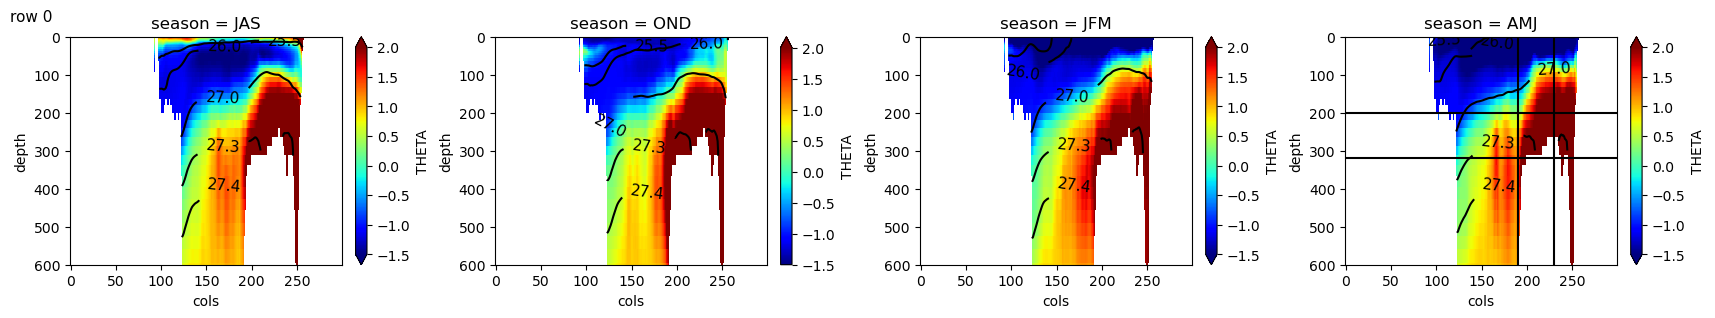

In [117]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row000_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    # density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k')
    plt.clabel(density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 11);
ax4.axhline(y=200,color='k')
ax4.axhline(y=320,color='k')
ax4.axvline(x=190,color='k')
ax4.axvline(x=230,color='k');

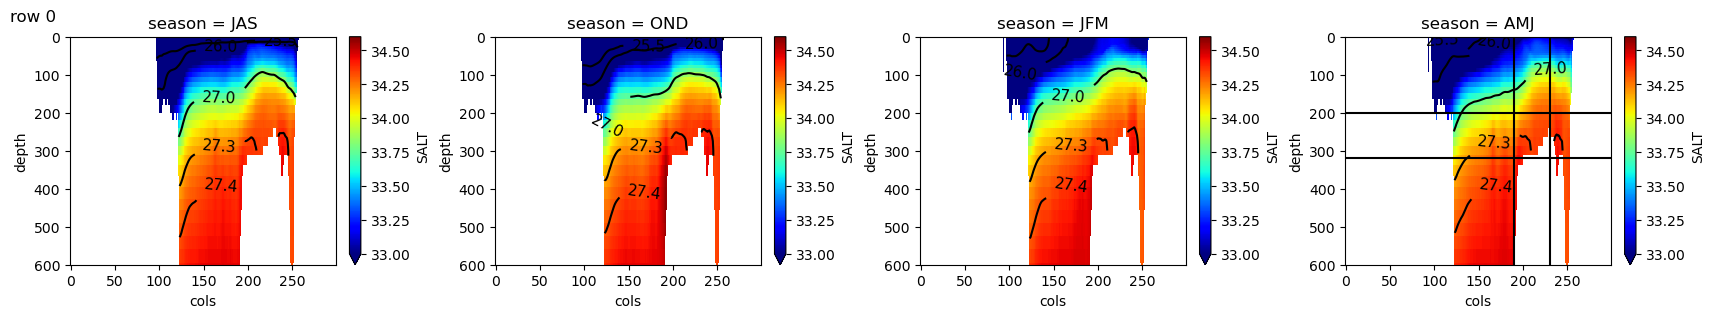

In [118]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row000_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=33,vmax=34.6)
    # density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k')
    plt.clabel(density_row000_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=200,color='k')
ax4.axhline(y=320,color='k')
ax4.axvline(x=190,color='k')
ax4.axvline(x=230,color='k');

In [56]:
# salt_row000_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
# plt.ylim(600,0);
# plt.suptitle("row 0",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=200,color='k')
# plt.axhline(y=320,color='k')
# plt.axvline(x=190,color='k')
# plt.axvline(x=230,color='k');

### Row 25

cols = slice(160,210) \
depth = slice(275,400)

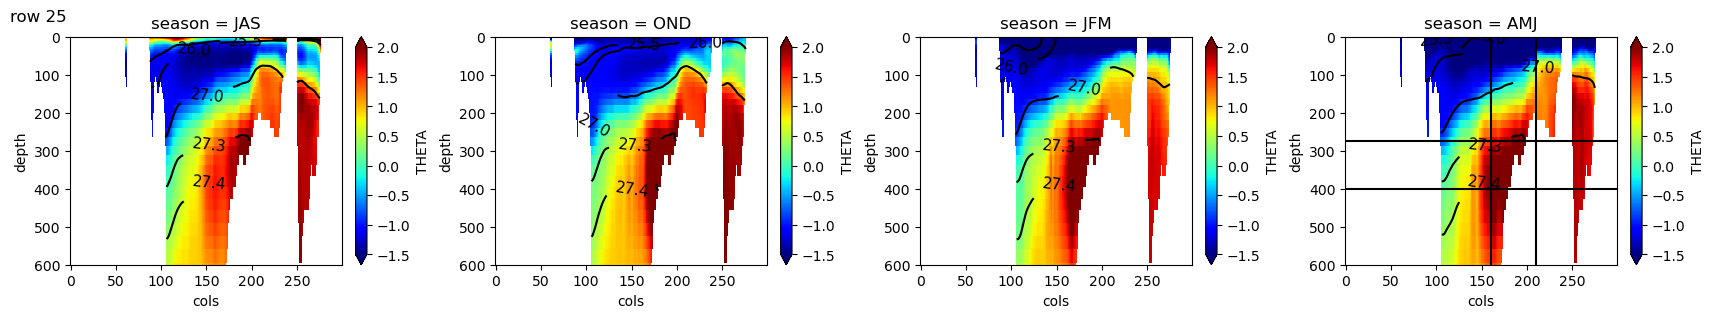

In [119]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row025_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row025_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=275,color='k')
ax4.axhline(y=400,color='k')
ax4.axvline(x=160,color='k')
ax4.axvline(x=210,color='k');

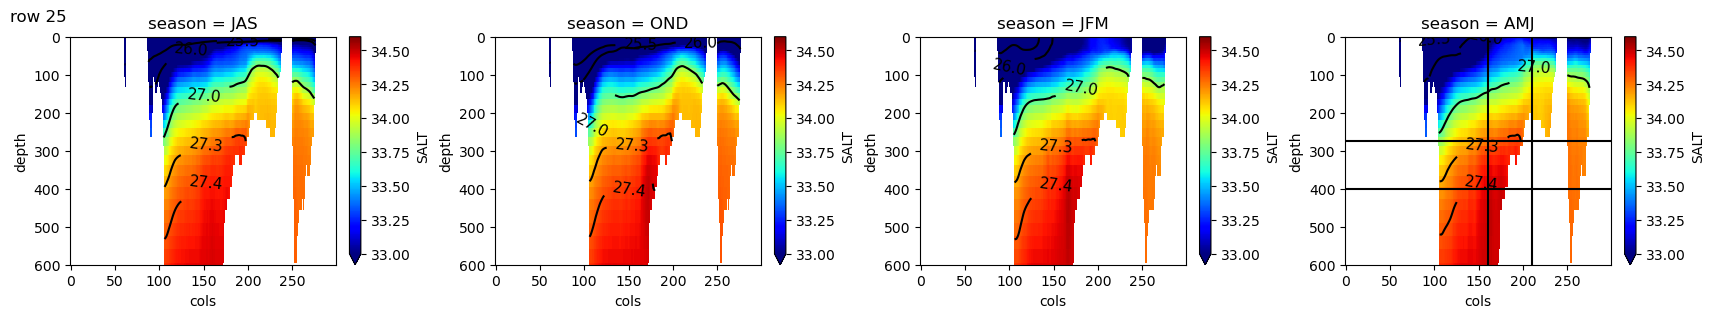

In [120]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row025_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=33,vmax=34.6)
    plt.clabel(density_row025_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=275,color='k')
ax4.axhline(y=400,color='k')
ax4.axvline(x=160,color='k')
ax4.axvline(x=210,color='k');

In [57]:
# theta_row025_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
# plt.ylim(600,0);
# plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=400,color='k')
# plt.axvline(x=160,color='k')
# plt.axvline(x=210,color='k');

In [58]:
# salt_row025_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
# plt.ylim(600,0);
# plt.suptitle("row 25",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=400,color='k')
# plt.axvline(x=160,color='k')
# plt.axvline(x=210,color='k');

### Row 50

cols = slice(145,160) \
depth = slice(300,450)

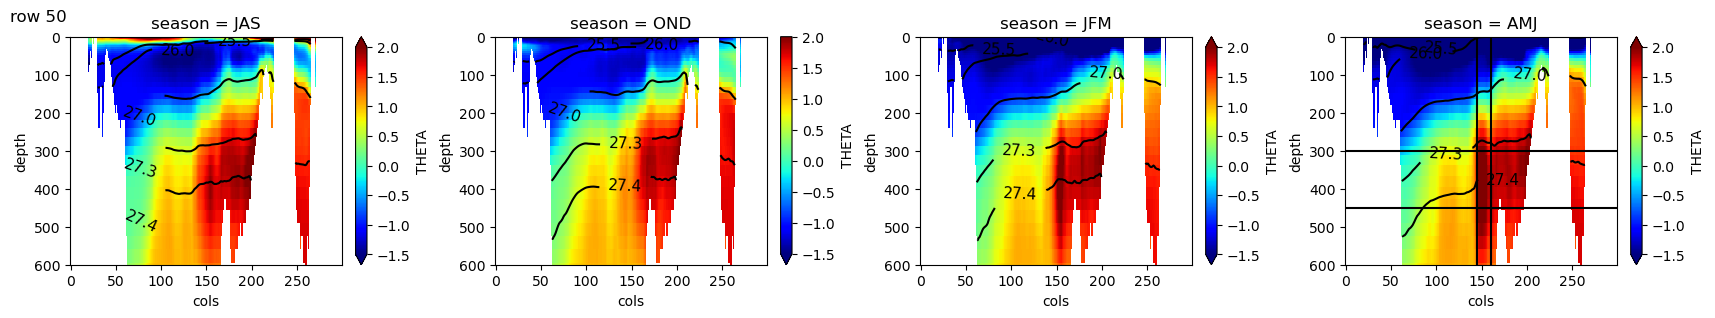

In [121]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row050_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row050_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=450,color='k')
ax4.axvline(x=145,color='k')
ax4.axvline(x=160,color='k');

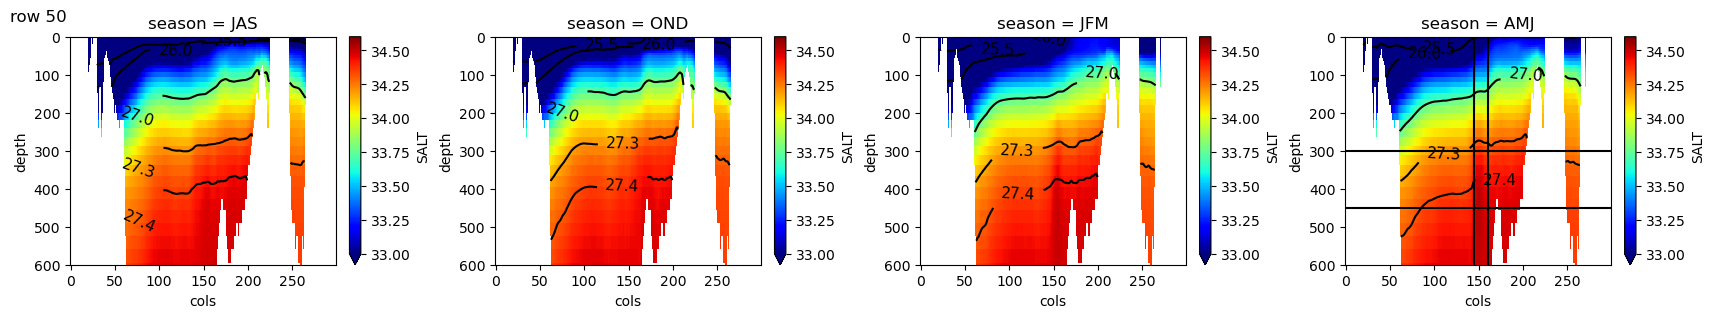

In [122]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row050_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=33,vmax=34.6)
    plt.clabel(density_row050_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=450,color='k')
ax4.axvline(x=145,color='k')
ax4.axvline(x=160,color='k');

In [59]:
# theta_row050_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
# plt.ylim(600,0);
# plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=400,color='k')
# plt.axvline(x=175,color='k')
# plt.axvline(x=210,color='k');

In [60]:
# salt_row050_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
# plt.ylim(600,0);
# plt.suptitle("row 50",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=400,color='k')
# plt.axvline(x=175,color='k')
# plt.axvline(x=210,color='k');

### Row 75

cols = slice(150,190) \
depth = slice(275,425)

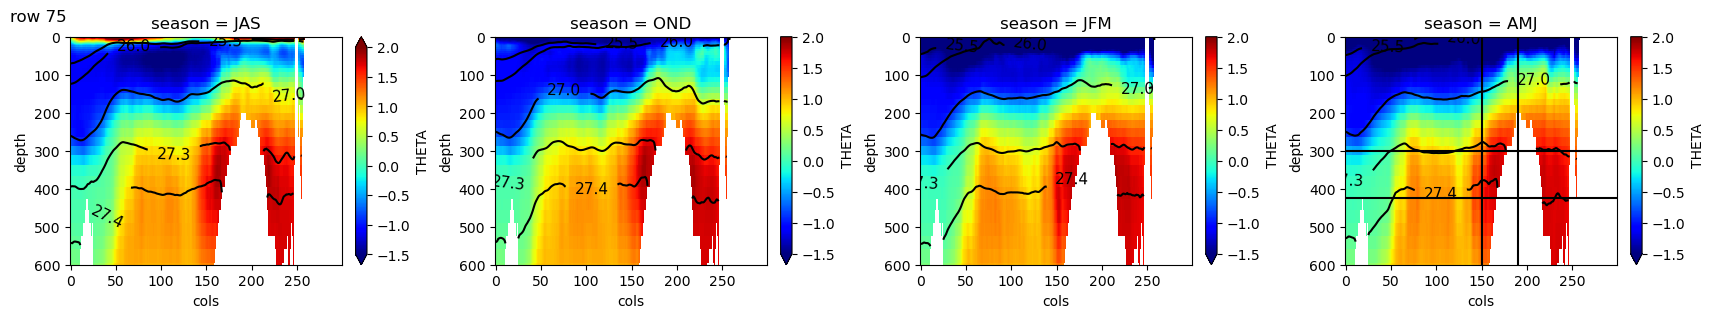

In [123]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row075_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row075_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=425,color='k')
ax4.axvline(x=150,color='k')
ax4.axvline(x=190,color='k');

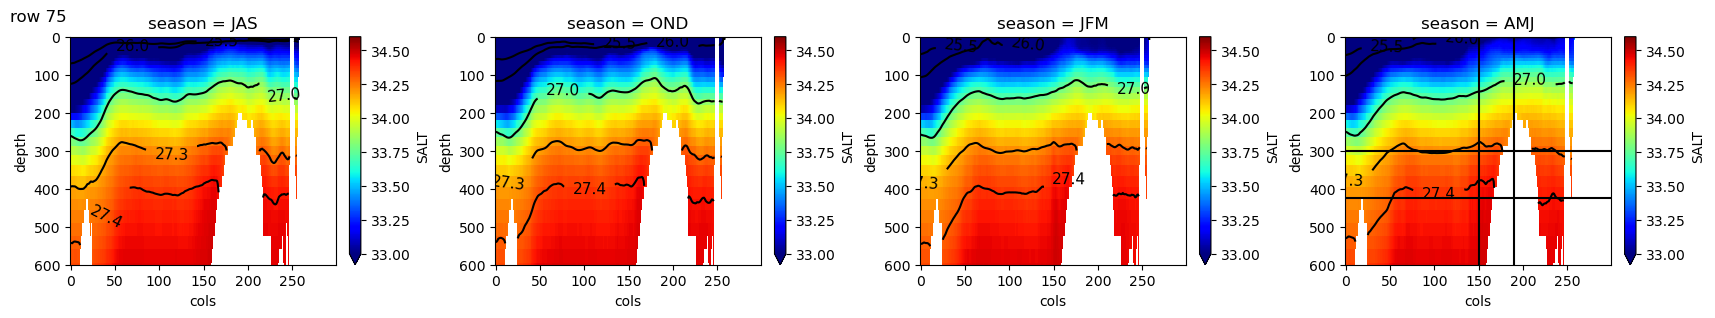

In [124]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row075_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=33,vmax=34.6)
    plt.clabel(density_row075_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=425,color='k')
ax4.axvline(x=150,color='k')
ax4.axvline(x=190,color='k');

In [61]:
# theta_row075_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
# plt.ylim(600,0);
# plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=425,color='k')
# plt.axvline(x=150,color='k')
# plt.axvline(x=190,color='k');

In [62]:
# salt_row075_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
# plt.ylim(600,0);
# plt.suptitle("row 75",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=425,color='k')
# plt.axvline(x=150,color='k')
# plt.axvline(x=190,color='k');

### Row 100

cols = slice(125,160) \
depth = slice(300,450)

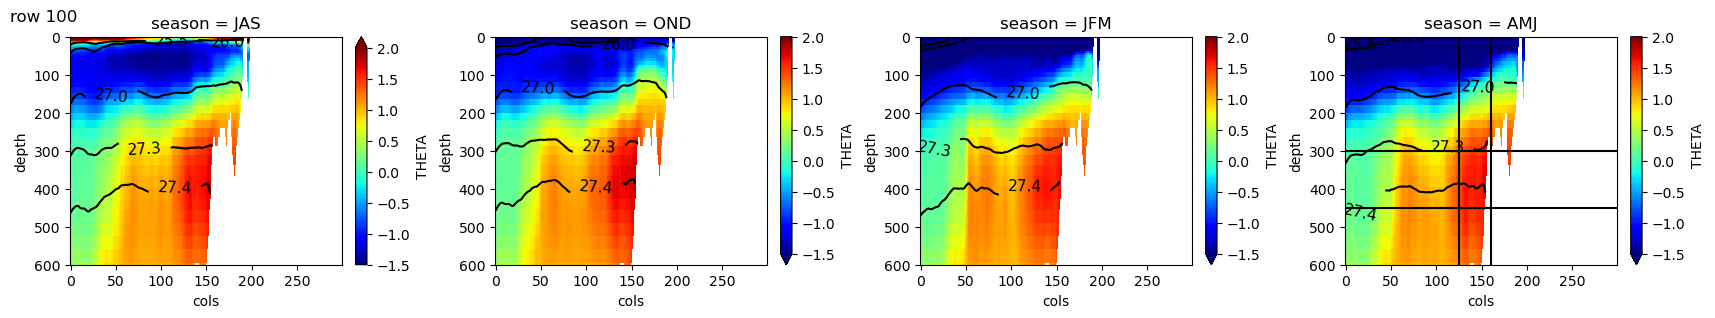

In [125]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row100_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=450,color='k')
ax4.axvline(x=125,color='k')
ax4.axvline(x=160,color='k');

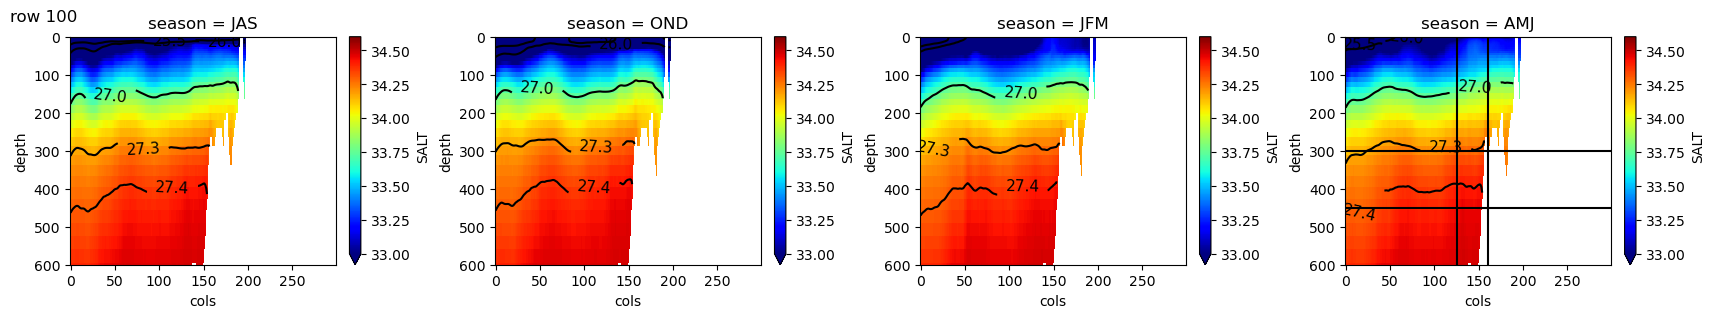

In [126]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row100_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=33,vmax=34.6)
    plt.clabel(density_row100_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=450,color='k')
ax4.axvline(x=125,color='k')
ax4.axvline(x=160,color='k');

In [63]:
# theta_row100_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
# plt.ylim(600,0);
# plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=300,color='k')
# plt.axhline(y=450,color='k')
# plt.axvline(x=125,color='k')
# plt.axvline(x=160,color='k');

In [64]:
# salt_row100_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
# plt.ylim(600,0);
# plt.suptitle("row 100",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=300,color='k')
# plt.axhline(y=450,color='k')
# plt.axvline(x=125,color='k')
# plt.axvline(x=160,color='k');

### Row 125

cols = slice(120,145) \
depth = slice(300,425)

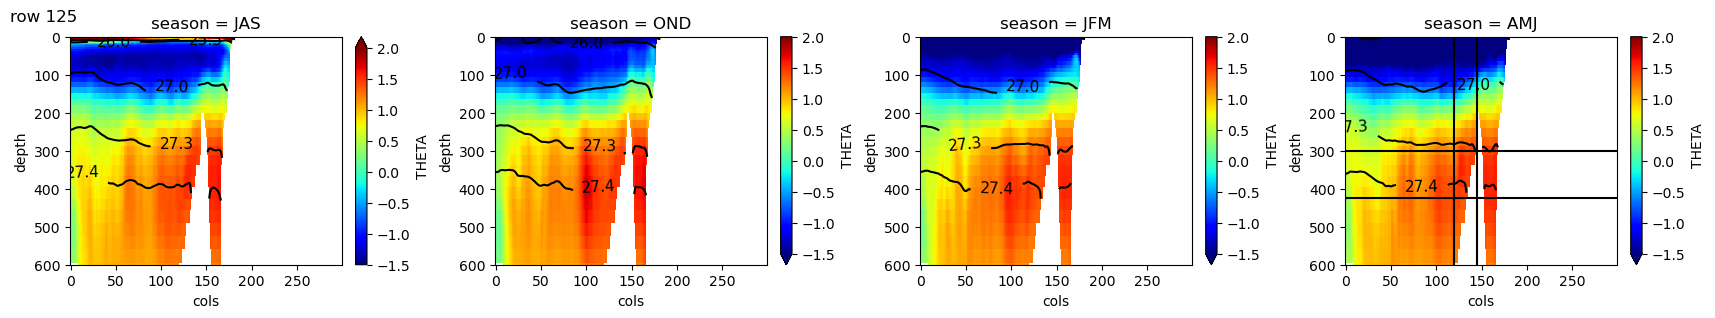

In [127]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row125_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row125_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=425,color='k')
ax4.axvline(x=120,color='k')
ax4.axvline(x=145,color='k');

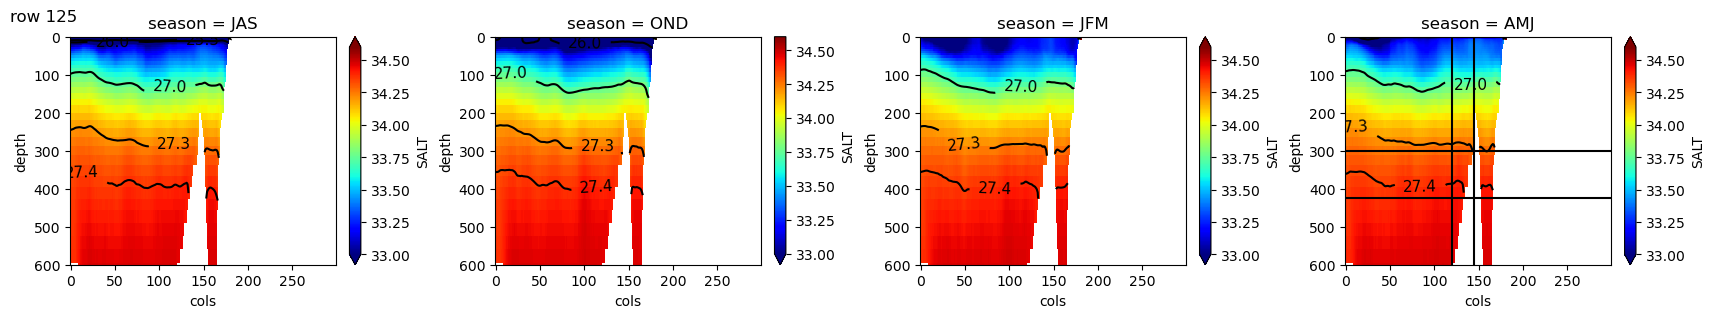

In [128]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row125_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=33,vmax=34.6)
    plt.clabel(density_row125_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=300,color='k')
ax4.axhline(y=425,color='k')
ax4.axvline(x=120,color='k')
ax4.axvline(x=145,color='k');

In [65]:
# theta_row125_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
# plt.ylim(600,0);
# plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=300,color='k')
# plt.axhline(y=425,color='k')
# plt.axvline(x=120,color='k')
# plt.axvline(x=145,color='k');

In [66]:
# salt_row125_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
# plt.ylim(600,0);
# plt.suptitle("row 125",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=300,color='k')
# plt.axhline(y=425,color='k')
# plt.axvline(x=120,color='k')
# plt.axvline(x=145,color='k');

### Row 150

cols = slice(125,155) \
depth = slice(275,400)

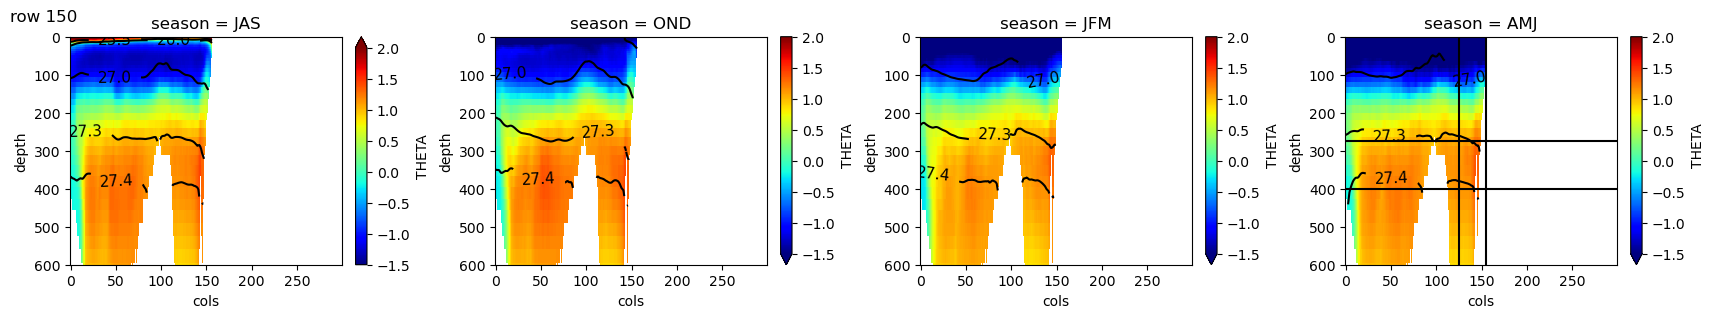

In [129]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    theta_row150_season.THETA.sel(season=i).plot(ax=ax,cmap='jet',vmin=-1.5,vmax=2)
    plt.clabel(density_row150_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=275,color='k')
ax4.axhline(y=400,color='k')
ax4.axvline(x=125,color='k')
ax4.axvline(x=155,color='k');

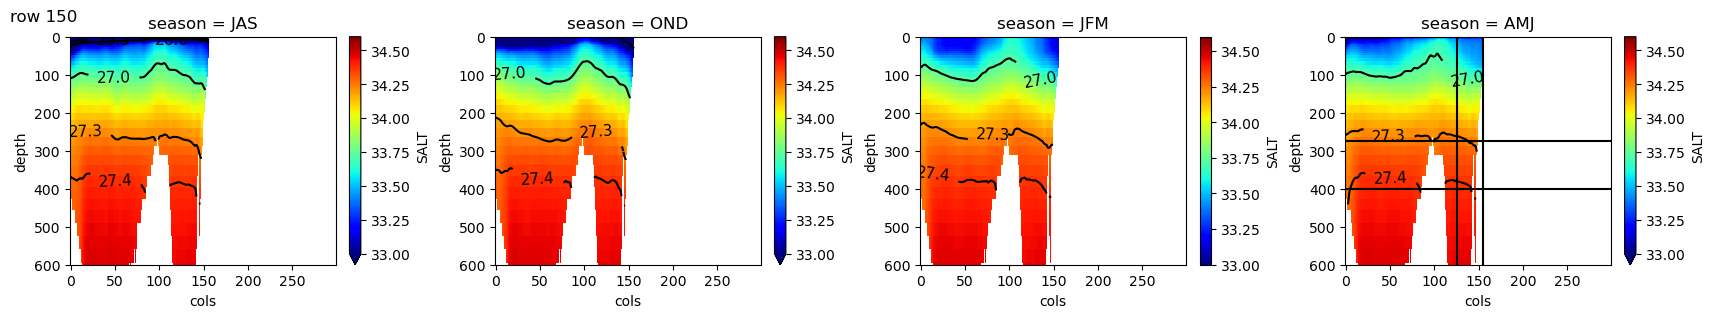

In [130]:
plt.rcParams['figure.figsize'] = [17, 3]
plt.rcParams['figure.constrained_layout.use'] = True

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4)
for i,ax in zip(season,[ax1,ax2,ax3,ax4]):
    salt_row150_season.SALT.sel(season=i).plot(ax=ax,cmap='jet',vmin=33,vmax=34.6)
    plt.clabel(density_row150_season.sel(season=i).plot.contour(ax=ax,colors='k',levels=density_levels), inline=True, fontsize=11)
    ax.set_ylim(600,0);
    
plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
ax4.axhline(y=275,color='k')
ax4.axhline(y=400,color='k')
ax4.axvline(x=125,color='k')
ax4.axvline(x=155,color='k');

In [67]:
# theta_row150_season.THETA.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=-1.5,vmax=2)
# plt.ylim(600,0);
# plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=400,color='k')
# plt.axvline(x=125,color='k')
# plt.axvline(x=155,color='k');

In [68]:
# salt_row150_season.SALT.sel(season=['JAS','OND','JFM','AMJ']).plot(col='season',cmap='jet',vmin=33,vmax=34.6)
# plt.ylim(600,0);
# plt.suptitle("row 150",x=0, y=1.01, horizontalalignment='left', verticalalignment='top', fontsize = 12);
# plt.axhline(y=275,color='k')
# plt.axhline(y=400,color='k')
# plt.axvline(x=125,color='k')
# plt.axvline(x=155,color='k');

### quick and dirty plot of seasonality for all core AW layers

In [109]:
## subset all boxes in datasets
theta_row000_season_AW = theta_row000_season.sel(depth=slice(200,320)).isel(cols=slice(190,230)).mean(['cols','depth']).THETA
theta_row025_season_AW = theta_row025_season.sel(depth=slice(275,400)).isel(cols=slice(160,210)).mean(['cols','depth']).THETA
theta_row050_season_AW = theta_row050_season.sel(depth=slice(300,450)).isel(cols=slice(145,160)).mean(['cols','depth']).THETA
theta_row075_season_AW = theta_row075_season.sel(depth=slice(300,425)).isel(cols=slice(150,190)).mean(['cols','depth']).THETA
theta_row100_season_AW = theta_row100_season.sel(depth=slice(300,450)).isel(cols=slice(125,160)).mean(['cols','depth']).THETA
theta_row125_season_AW = theta_row125_season.sel(depth=slice(300,425)).isel(cols=slice(120,145)).mean(['cols','depth']).THETA
theta_row150_season_AW = theta_row150_season.sel(depth=slice(275,400)).isel(cols=slice(125,155)).mean(['cols','depth']).THETA

salt_row000_season_AW = salt_row000_season.sel(depth=slice(200,320)).isel(cols=slice(190,230)).mean(['cols','depth']).SALT
salt_row025_season_AW = salt_row025_season.sel(depth=slice(275,400)).isel(cols=slice(160,210)).mean(['cols','depth']).SALT
salt_row050_season_AW = salt_row050_season.sel(depth=slice(300,450)).isel(cols=slice(145,160)).mean(['cols','depth']).SALT
salt_row075_season_AW = salt_row075_season.sel(depth=slice(300,425)).isel(cols=slice(150,190)).mean(['cols','depth']).SALT
salt_row100_season_AW = salt_row100_season.sel(depth=slice(300,450)).isel(cols=slice(125,160)).mean(['cols','depth']).SALT
salt_row125_season_AW = salt_row125_season.sel(depth=slice(300,425)).isel(cols=slice(120,145)).mean(['cols','depth']).SALT
salt_row150_season_AW = salt_row150_season.sel(depth=slice(275,400)).isel(cols=slice(125,155)).mean(['cols','depth']).SALT

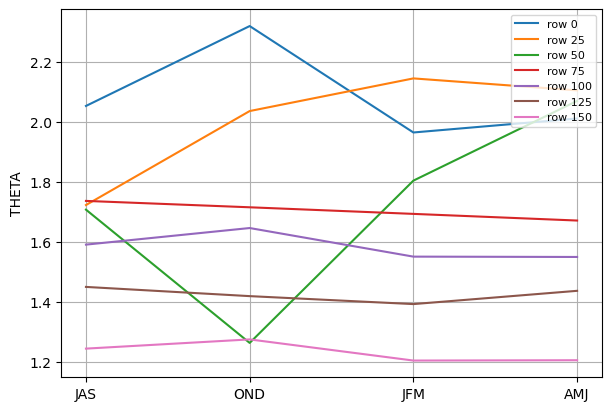

In [110]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot([1,2,3,4],theta_row000_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
plt.plot([1,2,3,4],theta_row025_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
plt.plot([1,2,3,4],theta_row050_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
plt.plot([1,2,3,4],theta_row075_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
plt.plot([1,2,3,4],theta_row100_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
plt.plot([1,2,3,4],theta_row125_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
plt.plot([1,2,3,4],theta_row150_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
plt.legend(loc='upper right', fontsize=8)
plt.xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
plt.ylabel("THETA")
plt.grid();

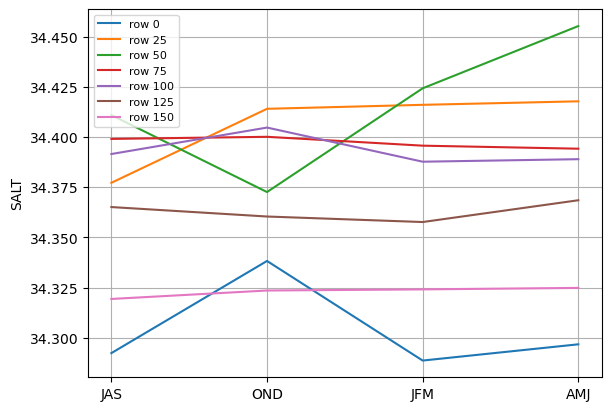

In [111]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.plot([1,2,3,4],salt_row000_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 0')
plt.plot([1,2,3,4],salt_row025_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 25')
plt.plot([1,2,3,4],salt_row050_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 50')
plt.plot([1,2,3,4],salt_row075_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 75')
plt.plot([1,2,3,4],salt_row100_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 100')
plt.plot([1,2,3,4],salt_row125_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 125')
plt.plot([1,2,3,4],salt_row150_season_AW.sel(season=['JAS','OND','JFM','AMJ']), label='row 150')
plt.legend(loc='upper left',fontsize=8)
plt.xticks(ticks=[1,2,3,4],labels=['JAS','OND','JFM','AMJ']);
plt.ylabel("SALT")
plt.grid();